In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Replace 'path_to_your_file.csv' with the actual path to your CSV file
df1 = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')


In [2]:
df1

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
df1.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [5]:
df1.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [6]:
# Count occurrences for categorical variables
categorical_vars = ['Gender', 'Occupation', 'BMI Category']

# Calculate value counts for each categorical variable
categorical_counts = {}
for var in categorical_vars:
    categorical_counts[var] = df1[var].value_counts()

# Print the counts for each categorical variable
print("Occurrences for Categorical Variables:")
for var, counts in categorical_counts.items():
    print(f"\n{var}:")
    print(counts)


Occurrences for Categorical Variables:

Gender:
Male      189
Female    185
Name: Gender, dtype: int64

Occupation:
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

BMI Category:
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64


In [7]:

# Calculate average Sleep Duration and Stress Level by Occupation
occupation_stats = df1.groupby('Occupation').agg({'Sleep Duration': 'mean', 'Stress Level': 'mean'})

# Calculate average Sleep Duration and Stress Level by Gender
gender_stats = df1.groupby('Gender').agg({'Sleep Duration': 'mean', 'Stress Level': 'mean'})

print("Average Sleep Duration and Stress Level by Occupation:")
print(occupation_stats)

print("\nAverage Sleep Duration and Stress Level by Gender:")
print(gender_stats)


Average Sleep Duration and Stress Level by Occupation:
                      Sleep Duration  Stress Level
Occupation                                        
Accountant                  7.113514      4.594595
Doctor                      6.970423      6.732394
Engineer                    7.987302      3.888889
Lawyer                      7.410638      5.063830
Manager                     6.900000      5.000000
Nurse                       7.063014      5.547945
Sales Representative        5.900000      8.000000
Salesperson                 6.403125      7.000000
Scientist                   6.000000      7.000000
Software Engineer           6.750000      6.000000
Teacher                     6.690000      4.525000

Average Sleep Duration and Stress Level by Gender:
        Sleep Duration  Stress Level
Gender                              
Female        7.229730      4.675676
Male          7.036508      6.079365


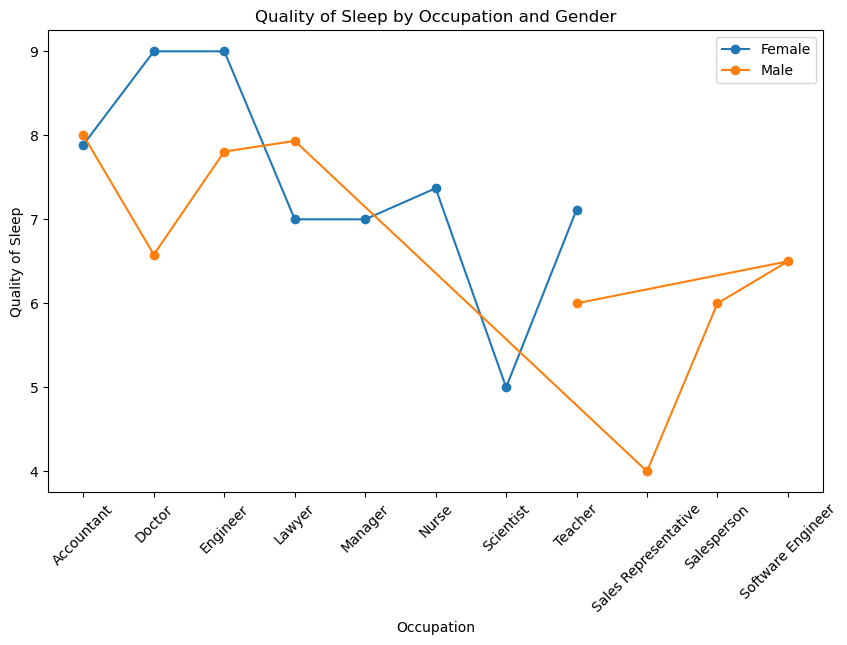

In [8]:

# Group the data by Occupation and Gender, and calculate the average Quality of Sleep
grouped_data = df1.groupby(['Occupation', 'Gender'])['Quality of Sleep'].mean().reset_index()

# Set up the plot
plt.figure(figsize=(10, 6))

# Iterate over each gender
for gender in grouped_data['Gender'].unique():
    # Filter the data for the current gender
    gender_data = grouped_data[grouped_data['Gender'] == gender]

    # Plot the line chart for Quality of Sleep
    plt.plot(gender_data['Occupation'], gender_data['Quality of Sleep'], marker='o', label=gender)

# Set the chart title and labels
plt.title('Quality of Sleep by Occupation and Gender')
plt.xlabel('Occupation')
plt.ylabel('Quality of Sleep')

# Add a legend
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


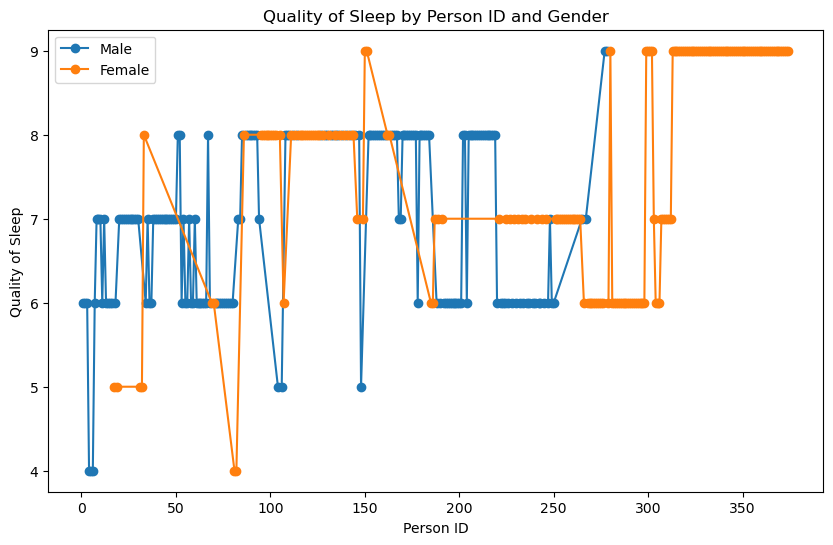

In [9]:

# Set up the plot
plt.figure(figsize=(10, 6))

# Iterate over each gender
for gender in df1['Gender'].unique():
    # Filter the data for the current gender
    gender_data = df1[df1['Gender'] == gender]

    # Plot the line chart for Quality of Sleep
    plt.plot(gender_data['Person ID'], gender_data['Quality of Sleep'], marker='o', label=gender)

# Set the chart title and labels
plt.title('Quality of Sleep by Person ID and Gender')
plt.xlabel('Person ID')
plt.ylabel('Quality of Sleep')

# Add a legend
plt.legend()

# Display the plot
plt.show()

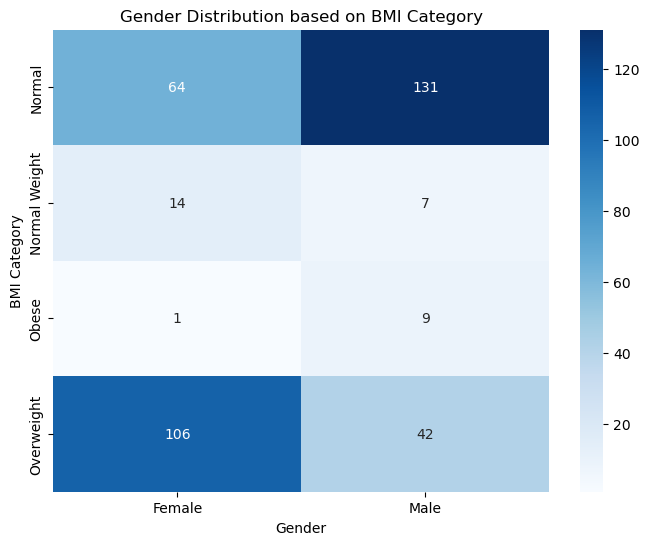

In [10]:

# Pivot the data to get the count of gender based on BMI category
pivot_table = df1.pivot_table(index='BMI Category', columns='Gender', aggfunc='size')

# Set up the plot
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues')

# Set the chart title and labels
plt.title('Gender Distribution based on BMI Category')
plt.xlabel('Gender')
plt.ylabel('BMI Category')

# Display the plot
plt.show()

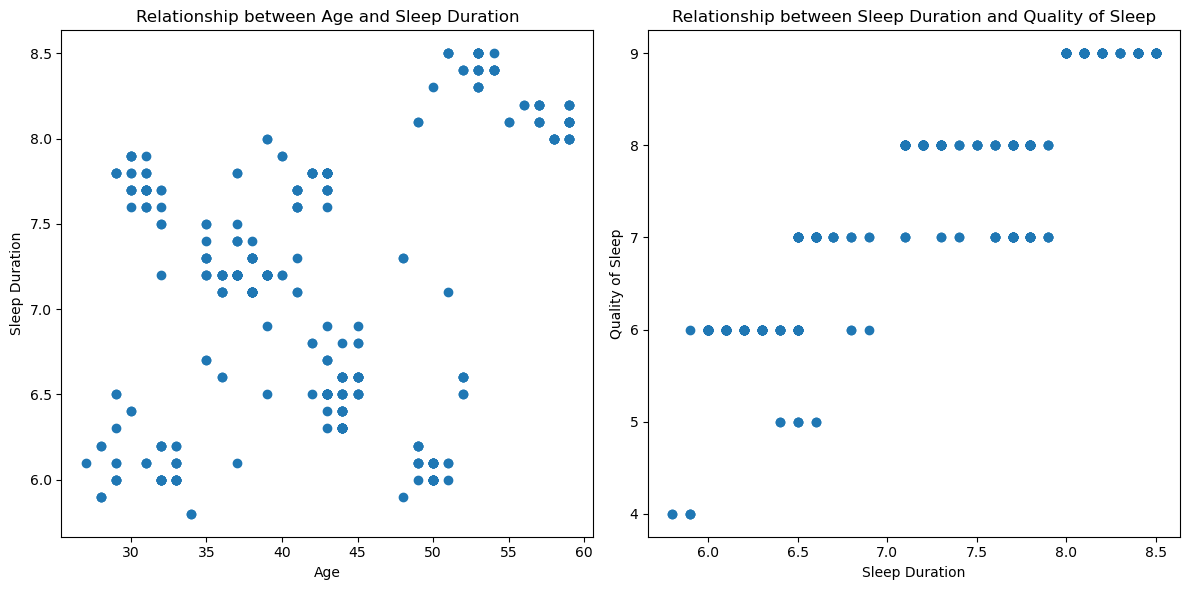

In [11]:

# Set up the plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Scatter plot for 'Age' and 'Sleep Duration'
axes[0].scatter(df1['Age'], df1['Sleep Duration'])
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Sleep Duration')
axes[0].set_title('Relationship between Age and Sleep Duration')

# Scatter plot for 'Sleep Duration' and 'Quality of Sleep'
axes[1].scatter(df1['Sleep Duration'], df1['Quality of Sleep'])
axes[1].set_xlabel('Sleep Duration')
axes[1].set_ylabel('Quality of Sleep')
axes[1].set_title('Relationship between Sleep Duration and Quality of Sleep')

# Adjust spacing between subplots
fig.tight_layout()

# Display the plots
plt.show()

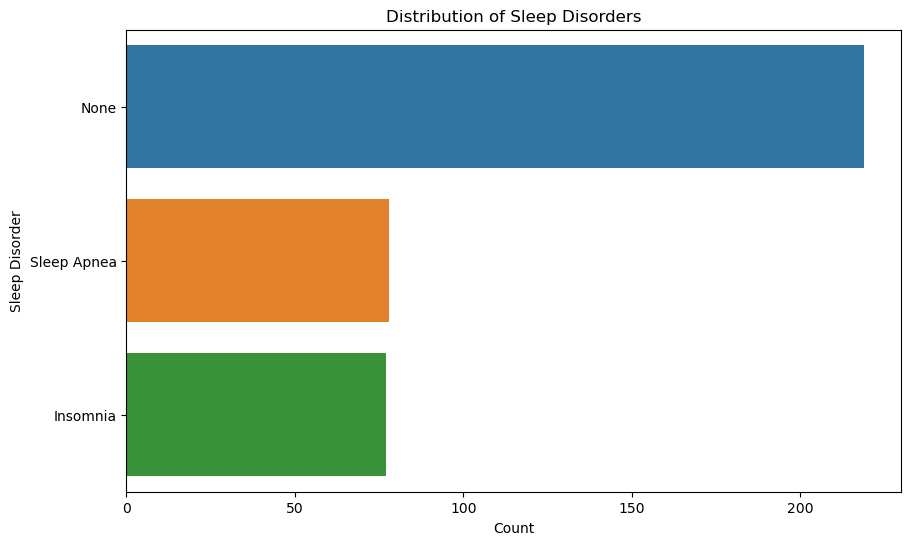

In [13]:

# Count the occurrences of each sleep disorder
sleep_disorder_counts = df1['Sleep Disorder'].value_counts()

# Set up the plot
plt.figure(figsize=(10, 6))

# Create the horizontal bar plot
sns.barplot(x=sleep_disorder_counts.values, y=sleep_disorder_counts.index, orient='h')

# Set the chart title and labels
plt.title('Distribution of Sleep Disorders')
plt.xlabel('Count')
plt.ylabel('Sleep Disorder')

# Display the plot
plt.show()

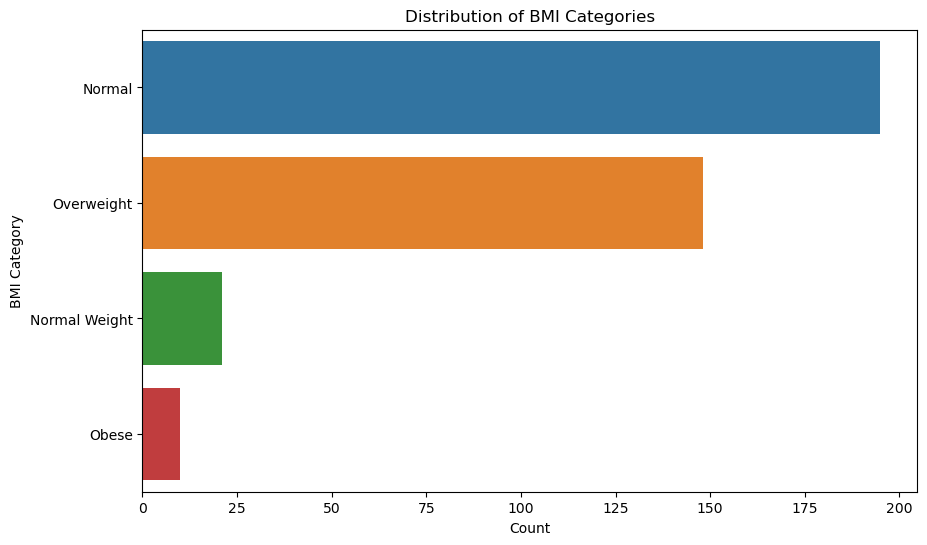

In [14]:

# Count the occurrences of each BMI category
bmi_category_counts = df1['BMI Category'].value_counts()

# Set up the plot
plt.figure(figsize=(10, 6))

# Create the horizontal bar plot
sns.barplot(x=bmi_category_counts.values, y=bmi_category_counts.index, orient='h')

# Set the chart title and labels
plt.title('Distribution of BMI Categories')
plt.xlabel('Count')
plt.ylabel('BMI Category')

# Display the plot
plt.show()

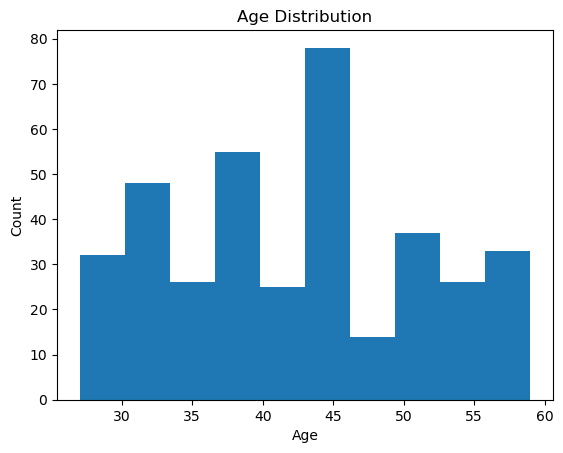

In [15]:
# Histogram: Age distribution
plt.hist(df1['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

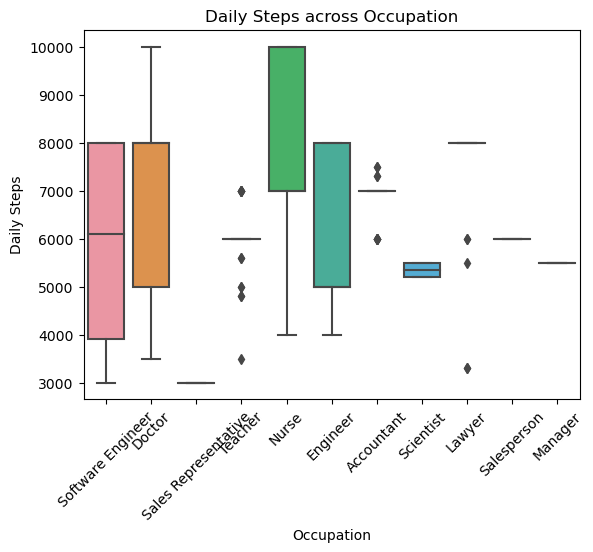

In [16]:

# Box plot: Daily Steps across Occupation
sns.boxplot(x='Occupation', y='Daily Steps', data=df1)
plt.xlabel('Occupation')
plt.ylabel('Daily Steps')
plt.title('Daily Steps across Occupation')
plt.xticks(rotation=45)
plt.show()


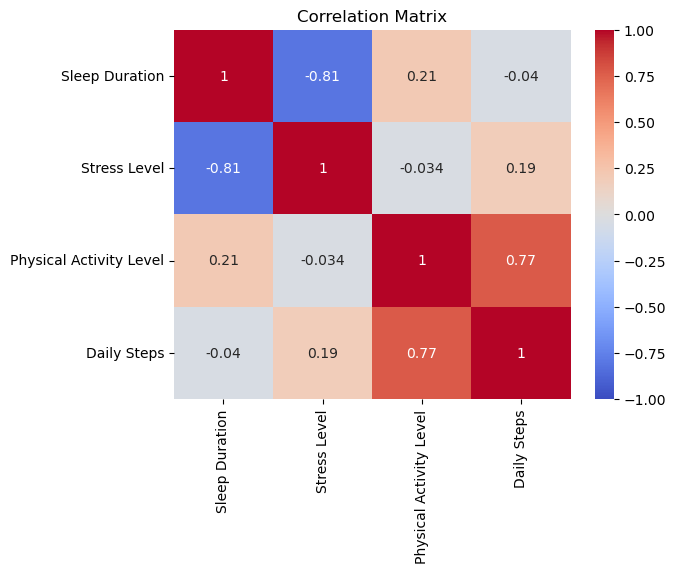

In [17]:

# Select the variables for correlation analysis
correlation_vars = ['Sleep Duration', 'Stress Level', 'Physical Activity Level', 'Daily Steps']

# Compute the correlation matrix
correlation_matrix = df1[correlation_vars].corr()

# Visualize the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


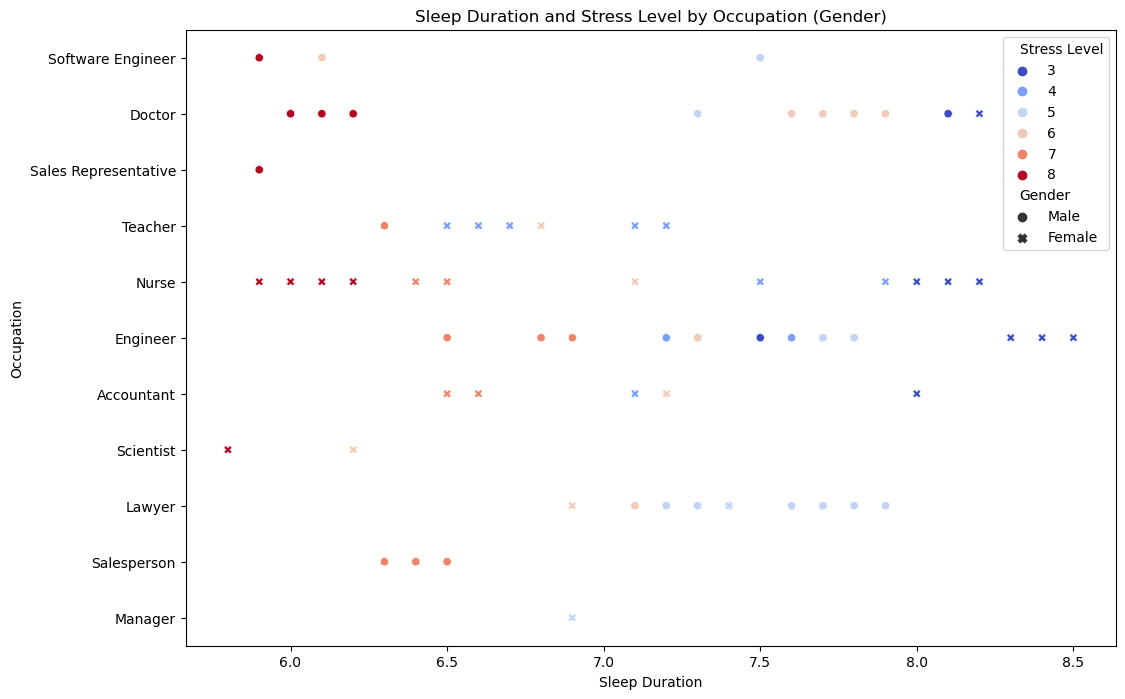

In [18]:

# Set up the plot
plt.figure(figsize=(12, 8))

# Create the scatter plot
sns.scatterplot(data=df1, x='Sleep Duration', y='Occupation', hue='Stress Level', style='Gender', palette='coolwarm')

# Set the chart title and labels
plt.title('Sleep Duration and Stress Level by Occupation (Gender)')
plt.xlabel('Sleep Duration')
plt.ylabel('Occupation')

# Display the plot
plt.show()

In [19]:

# Separate Sleep Duration by BMI Category
bmi_category_1 = df1[df1['BMI Category'] == 'Underweight']['Sleep Duration']
bmi_category_2 = df1[df1['BMI Category'] == 'Normal weight']['Sleep Duration']
bmi_category_3 = df1[df1['BMI Category'] == 'Overweight']['Sleep Duration']
bmi_category_4 = df1[df1['BMI Category'] == 'Obese']['Sleep Duration']

# Perform t-test
statistic, p_value = stats.ttest_ind(bmi_category_1, bmi_category_2)

# Check significance level (e.g., alpha = 0.05)
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in Sleep Duration between BMI Category 1 and BMI Category 2.")
else:
    print("There is no significant difference in Sleep Duration between BMI Category 1 and BMI Category 2.")


There is no significant difference in Sleep Duration between BMI Category 1 and BMI Category 2.


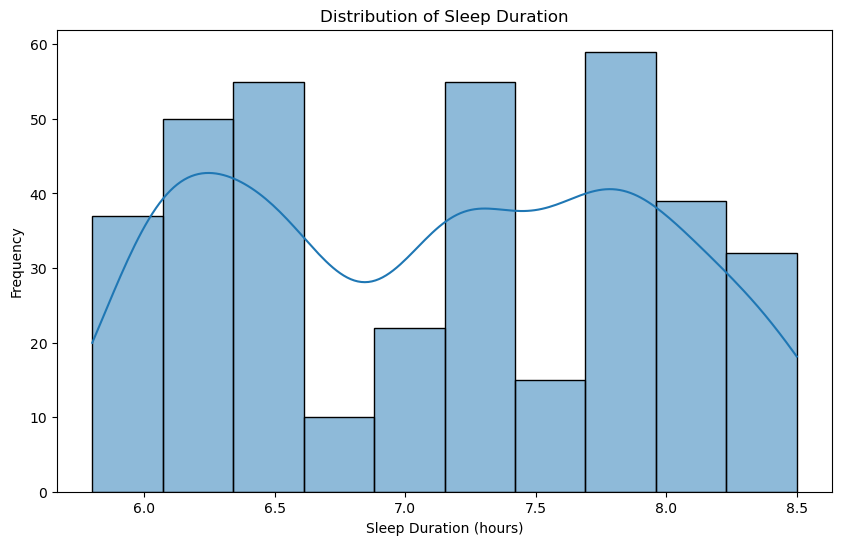

In [20]:

# Distribution of Sleep Duration
plt.figure(figsize=(10, 6))
sns.histplot(df1['Sleep Duration'], kde=True)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
# plt.savefig('output/sleep-duration-distribution-3e0851.png')
plt.show()


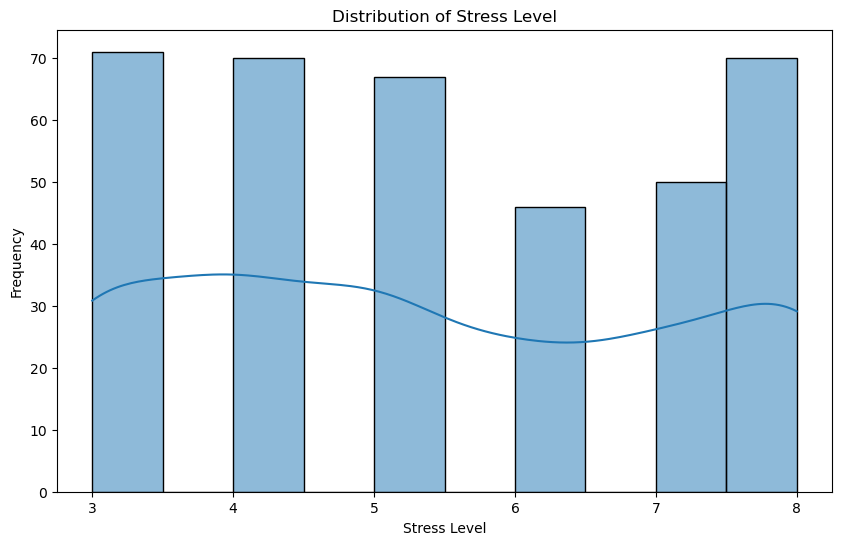

In [21]:

# Distribution of Stress Level
plt.figure(figsize=(10, 6))
sns.histplot(df1['Stress Level'], kde=True)
plt.title('Distribution of Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
# plt.savefig('output/stress-level-distribution-3e0851.png')
plt.show()

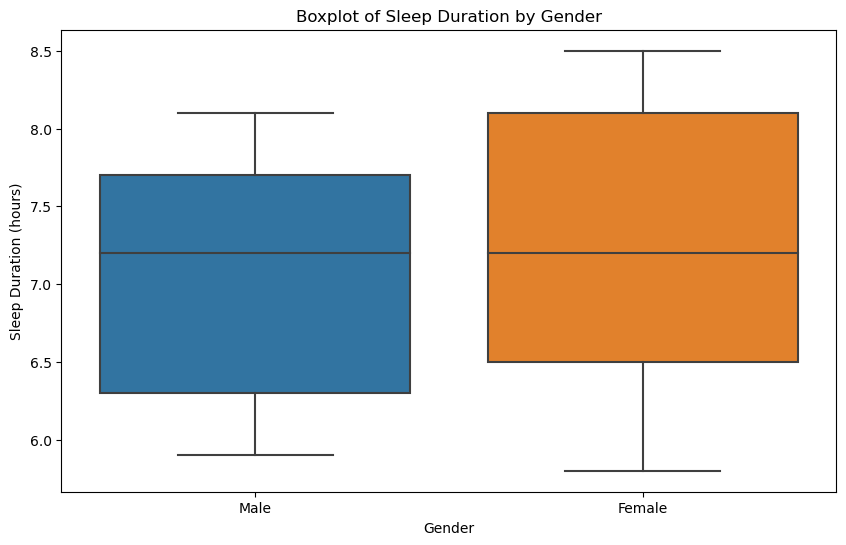

In [22]:

# Boxplot of Sleep Duration by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Sleep Duration', data=df1)
plt.title('Boxplot of Sleep Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Sleep Duration (hours)')
# plt.savefig('output/sleep-duration-gender-3e0851.png')
plt.show()


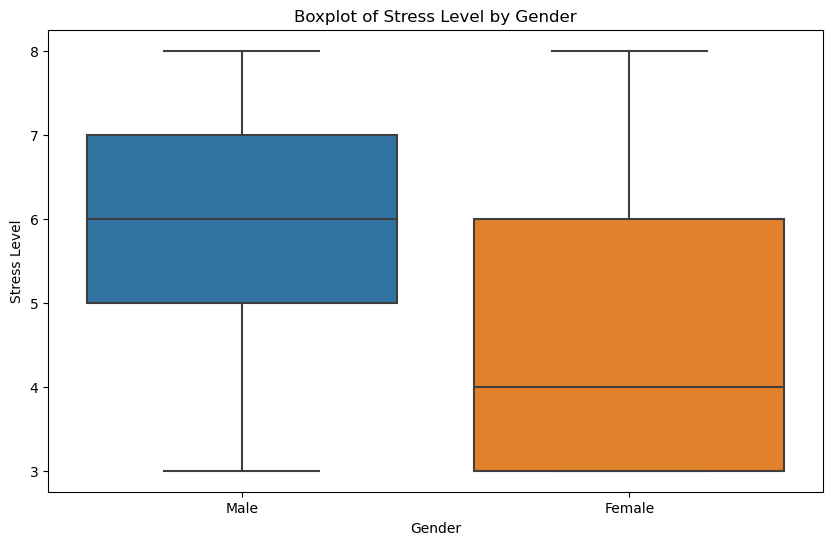

In [23]:
# Boxplot of Stress Level by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Stress Level', data=df1)
plt.title('Boxplot of Stress Level by Gender')
plt.xlabel('Gender')
plt.ylabel('Stress Level')
# plt.savefig('output/stress-level-gender-3e0851.png')
plt.show()

Correlation between Sleep Duration and Stress Level: -0.8110230278940451


C:\Users\Admin\AppData\Local\Temp\ipykernel_11272\58765207.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x1, y1, c=colors1)


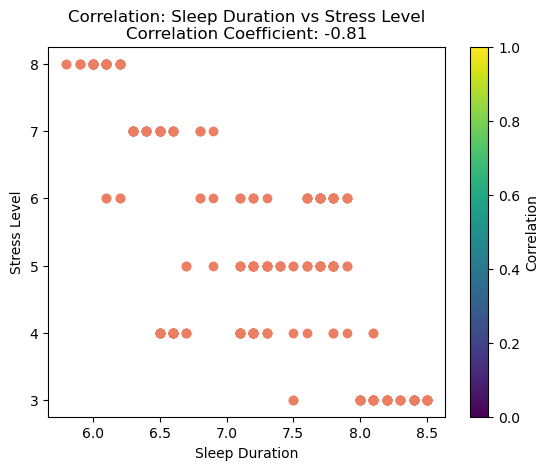

In [24]:

# Correlation between Sleep Duration and Stress Level
correlation_sleep_stress = df1['Sleep Duration'].corr(df1['Stress Level'])
print("Correlation between Sleep Duration and Stress Level:", correlation_sleep_stress)

# # Scatter plot: Sleep Duration vs Stress Level
# plt.scatter(df1['Sleep Duration'], df1['Stress Level'])
# plt.xlabel('Sleep Duration')
# plt.ylabel('Stress Level')
# plt.title('Correlation: Sleep Duration vs Stress Level')
# plt.show()
# Scatter plot: Sleep Duration vs Stress Level
x1 = df1['Sleep Duration']
y1 = df1['Stress Level']
corr1 = np.corrcoef(x1, y1)[0, 1]  # Calculate correlation coefficient
c1 = np.abs(corr1)  # Map correlation to color intensity
colors1 = plt.cm.coolwarm(c1)  # Convert color intensity to color
plt.scatter(x1, y1, c=colors1)
plt.colorbar(label='Correlation')
plt.xlabel('Sleep Duration')
plt.ylabel('Stress Level')
plt.title(f'Correlation: Sleep Duration vs Stress Level\nCorrelation Coefficient: {corr1:.2f}')
plt.show()


Correlation between Physical Activity Level and Daily Steps: 0.7727230504529325


C:\Users\Admin\AppData\Local\Temp\ipykernel_11272\2021704580.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x2, y2, c=colors2)


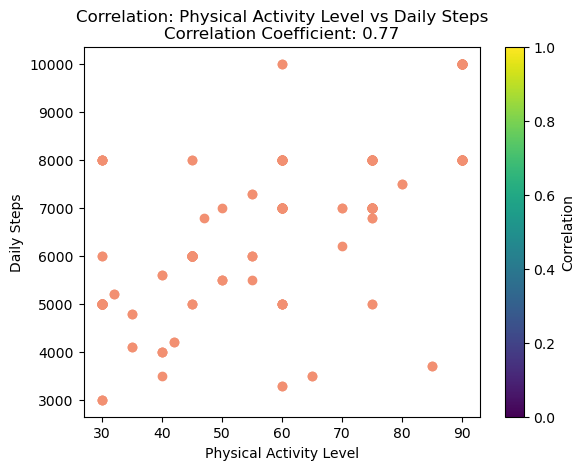

In [25]:

# Correlation between Physical Activity Level and Daily Steps
correlation_activity_steps = df1['Physical Activity Level'].corr(df1['Daily Steps'])
print("Correlation between Physical Activity Level and Daily Steps:", correlation_activity_steps)


# # Scatter plot: Physical Activity Level vs Daily Steps
# plt.scatter(df1['Physical Activity Level'], df1['Daily Steps'])
# plt.xlabel('Physical Activity Level')
# plt.ylabel('Daily Steps')
# plt.title('Correlation: Physical Activity Level vs Daily Steps')
# plt.show()

# Scatter plot: Physical Activity Level vs Daily Steps
x2 = df1['Physical Activity Level']
y2 = df1['Daily Steps']
corr2 = np.corrcoef(x2, y2)[0, 1]  # Calculate correlation coefficient
c2 = np.abs(corr2)  # Map correlation to color intensity
colors2 = plt.cm.coolwarm(c2)  # Convert color intensity to color
plt.scatter(x2, y2, c=colors2)
plt.colorbar(label='Correlation')
plt.xlabel('Physical Activity Level')
plt.ylabel('Daily Steps')
plt.title(f'Correlation: Physical Activity Level vs Daily Steps\nCorrelation Coefficient: {corr2:.2f}')
plt.show()


In [26]:

# Select the relevant features and target variable
features = ['Sleep Duration', 'Age', 'Quality of Sleep', 'Physical Activity Level', 'BMI Category', 'Occupation']
target = 'Stress Level'

# Perform one-hot encoding on the categorical features
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df1[features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(encoded_features, df1[target], test_size=0.2, random_state=42)

# Create a RandomForestClassifier model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 1.0


In [27]:
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 1.0
Recall: 1.0
F1-score: 1.0
